In [92]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [14]:
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [15]:
dataset.shape

(999, 12)

In [ ]:
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredoto",
                  "Arivo", "Salario", "Saiu"]

In [21]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [22]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

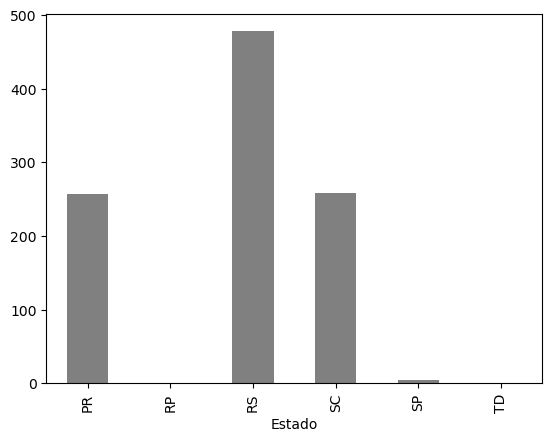

In [24]:
agrupado.plot.bar(color = 'gray')

In [29]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

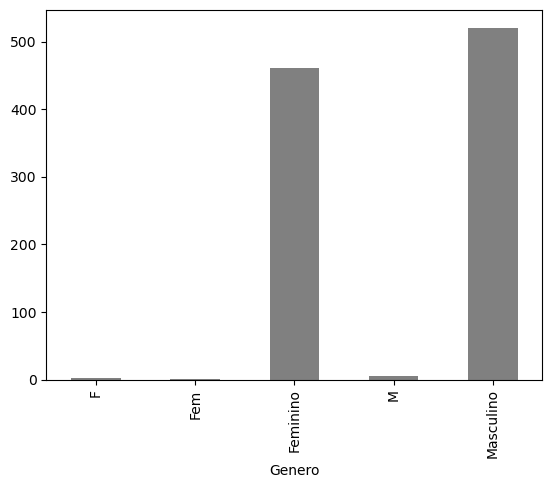

In [31]:
agrupado.plot.bar(color = 'gray')

In [32]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

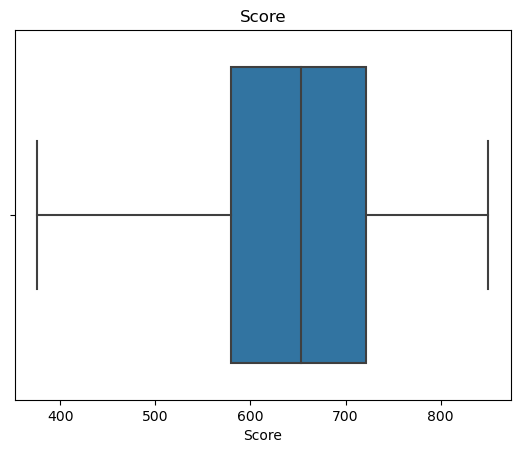

In [35]:
srn.boxplot(x = dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

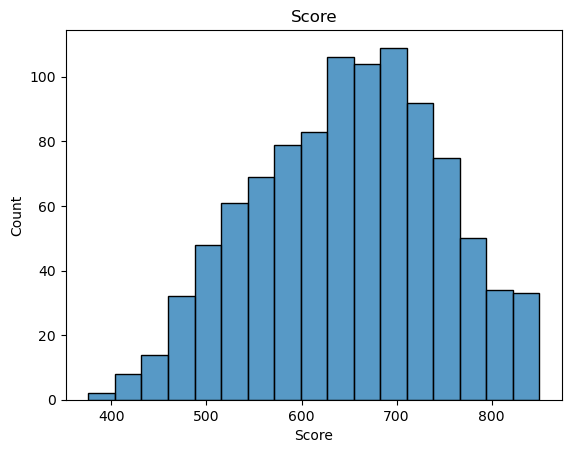

In [43]:
srn.histplot(dataset['Score']).set_title('Score')

In [44]:
dataset['Idade'].describe() 

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

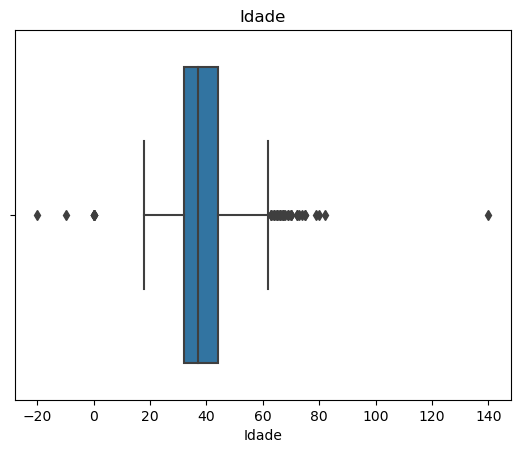

In [45]:
srn.boxplot(x = dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

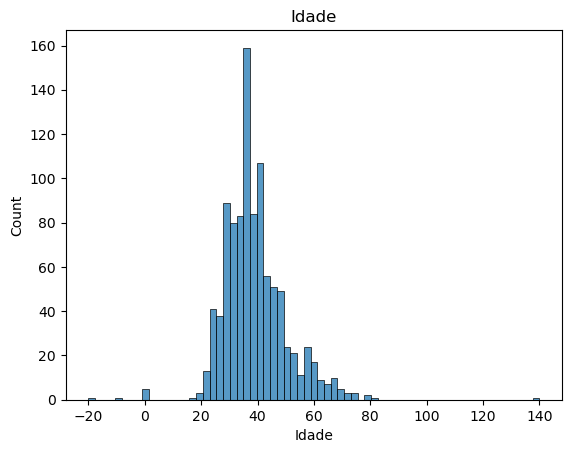

In [46]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [47]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

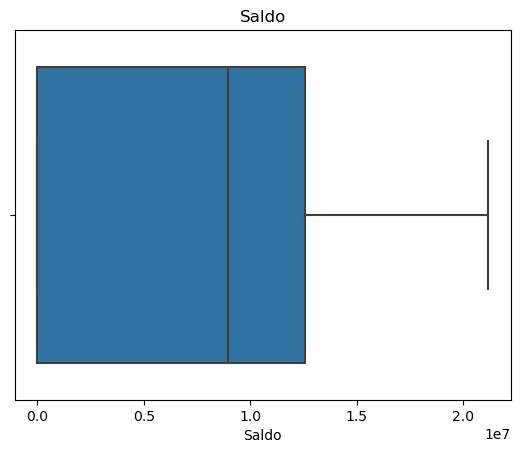

In [48]:
srn.boxplot(x = dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

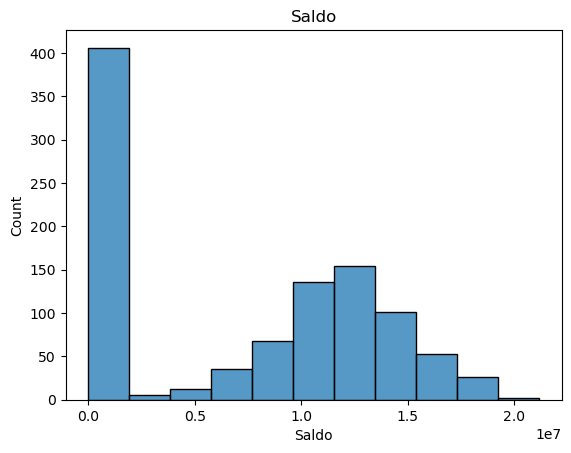

In [51]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [52]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

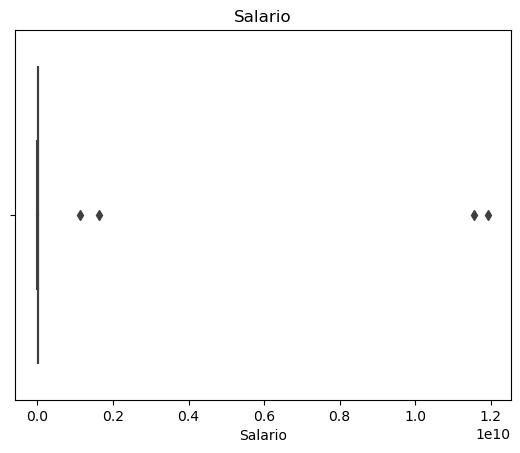

In [53]:
srn.boxplot(x = dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

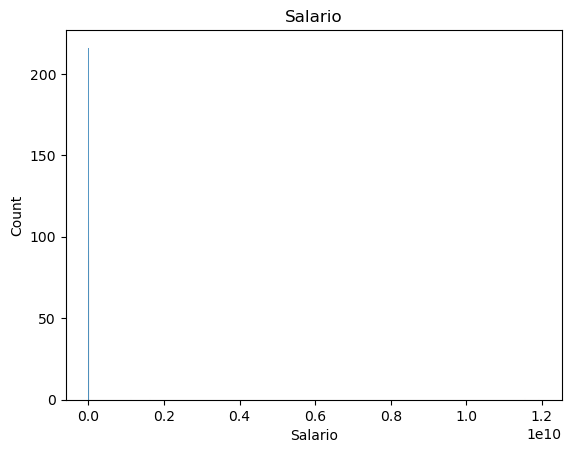

In [56]:
srn.histplot(dataset['Salario']).set_title('Salario')

In [57]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredoto    0
Arivo             0
Salario           7
Saiu              0
dtype: int64

In [58]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [62]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [63]:
dataset['Salario'].fillna(mediana, inplace=True)

In [64]:
dataset['Salario'].isnull().sum()

0

In [66]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [67]:
dataset['Genero'].isnull().sum()

8

In [68]:
dataset['Genero'].fillna('Masculino', inplace=True)

In [69]:
dataset['Genero'].isnull().sum()

0

In [74]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [76]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [78]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [79]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [80]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [81]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu


In [82]:
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [83]:
dataset.drop_duplicates(subset="Id", keep='first', inplace=True)
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu


In [84]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [85]:
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [87]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [88]:
mediana = sts.median(dataset['Salario'])
mediana 

8637195.5

In [89]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu


In [90]:
dataset.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredoto,Arivo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [91]:
dataset.shape

(998, 12)